# LeNet Implementation in Tensorflow

The motivation behind LeNet was to develop a convolutional neural network architecture that could accurately recognize and classify handwritten digits, which were at the time a common application of computer vision.
<br>
LeNet was introduced in 1998 by Yann LeCun, Leon Bottou, Yoshua Bengio, and Patrick Haffner. It was one of the first successful implementations of convolutional neural networks and was considered groundbreaking for its time. The architecture was specifically designed for digit recognition, but it paved the way for many other CNN-based models used in various computer vision tasks.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Loading The MNIST Dataset and Preprocessing

LeNet was trained on the MNIST dataset, which consists of 60,000 training images and 10,000 test images of handwritten digits. The dataset was widely used as a benchmark for image classification algorithms, and LeNet achieved state-of-the-art performance at the time, with a classification accuracy of 98.2% on the test set.


In [2]:
ds = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = ds.load_data()

X_train.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

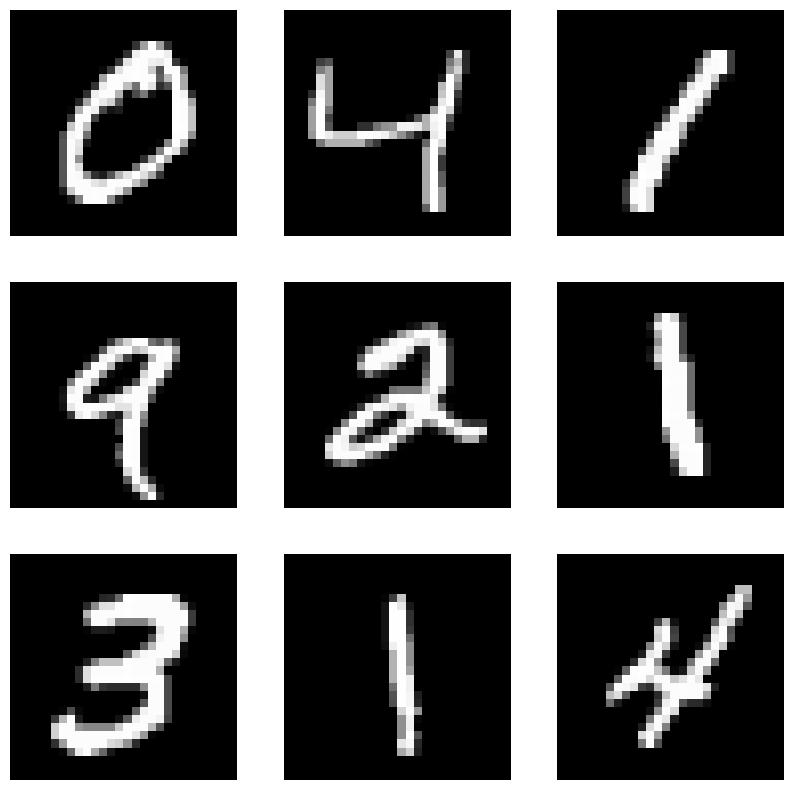

In [3]:
plt.figure(figsize=(10,10))
for i in range(1,10):
  ax = plt.subplot(3,3,i)
  plt.axis("off")
  plt.imshow(X_train[i])
  plt.gray()

Most Convolutional Neural Networks accept 4-dimensional tensors as input, for that we need to reshape our training data. The original LeNet model used 32 x 32 images, but the MNIST dataset is 28 x 28. So we need to pad the images with zeros and rescale the pixels to be in between 0 and 1.

In [4]:
X_train , X_test = X_train/255.0, X_test/255.0

X_train = tf.reshape(X_train, [-1,28,28,1])
X_test = tf.reshape(X_test, [-1, 28,28, 1])
X_train = tf.pad(X_train, [[0, 0], [2, 2], [2, 2], [0, 0]], "CONSTANT") 
X_test = tf.pad(X_test, [[0, 0], [2, 2], [2, 2], [0, 0]], "CONSTANT") 

X_train.shape

TensorShape([60000, 32, 32, 1])

## The LeNet Architecture
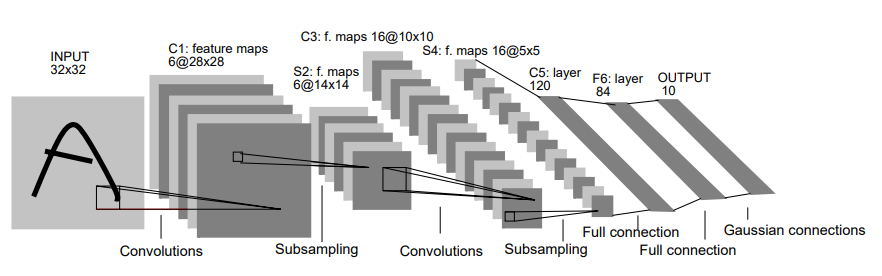
<br>The LeNet architecture consists of seven layers: two convolutional layers, two subsampling layers (also known as pooling layers), and three fully connected layers. The input to the network is a 32x32 grayscale image of a handwritten digit, and the output is a probability distribution over the ten possible digits (0-9).

The first layer of the network is a convolutional layer with six filters, each of size 5x5. The second layer is also a convolutional layer with sixteen filters, each of size 5x5. Both convolutional layers use a sigmoid activation function.

The third and fourth layers are subsampling layers, each with a filter size of 2x2 and a stride of 2. These layers reduce the spatial size of the feature maps while retaining the most important features.

The fifth layer is a fully connected layer with 120 neurons, followed by a second fully connected layer with 84 neurons. Both fully connected layers use a sigmoid activation function.

The final layer is a fully connected layer with 10 neurons, one for each possible digit. The output of this layer is passed through a softmax function to obtain a probability distribution over the ten possible digits.

In [31]:
def le_net():
  input = tf.keras.layers.Input(shape=(32,32,1))
  x = tf.keras.layers.Conv2D(6, kernel_size=(5,5),strides=(1,1), activation='tanh')(input)
  x = tf.keras.layers.AvgPool2D(pool_size=(2,2))(x)
  x = tf.keras.layers.Activation('sigmoid')(x)
  x = tf.keras.layers.Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='tanh')(x)
  x = tf.keras.layers.AvgPool2D(pool_size=(2,2))(x)
  x = tf.keras.layers.Activation('sigmoid')(x)
  x = tf.keras.layers.Conv2D(120, kernel_size=(5,5), strides=(1,1), activation='tanh')(x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(84, activation='tanh')(x)
  x = tf.keras.layers.Dense(10, activation='softmax')(x)
  return tf.keras.models.Model(input, x, name='LeNet')

model = le_net()
model.summary()

Model: "LeNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_8 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 activation_8 (Activation)   (None, 14, 14, 6)         0         
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_9 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                 

Let's compile the model using the Adam optimizer with a learning rate equal to 0.001. We will use the Sparse Categorical Cross Entropy as our loss function, it measures the negative of the natural logarithm of the true class probability.
The metric we'll use is the accuracy.

In [32]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)


## Traning the Model

The model is trained for 50 iterations with a batch size of 64, we'll use 2000 images (0.033) for the valitdation. The H variable is the training history.

In [33]:
EPOCHS = 50
BATCH = 64

import os
checkpoint_path = "/content/ckpts/"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path +'model.{epoch:02d}-{val_loss:.2f}.h5',
    save_weights_only=True,
    verbose=1,
    save_freq='epoch',
    period=2
)


H = model.fit(X_train,
              y_train,
              epochs=EPOCHS,
              batch_size=BATCH,
              validation_split=0.033,
              callbacks=[cp_callback],
)

Epoch 1/50
907/907 [==============================] - 6s 5ms/step - loss: 1.2943 - accuracy: 0.5386 - val_loss: 0.3787 - val_accuracy: 0.8879
Epoch 2/50
900/907 [============================>.] - ETA: 0s - loss: 0.3797 - accuracy: 0.8810
Epoch 2: saving model to /content/ckpts/model.02-0.20.h5
907/907 [==============================] - 5s 5ms/step - loss: 0.3791 - accuracy: 0.8811 - val_loss: 0.2007 - val_accuracy: 0.9409
Epoch 3/50
907/907 [==============================] - 4s 4ms/step - loss: 0.2916 - accuracy: 0.9082 - val_loss: 0.1889 - val_accuracy: 0.9419
Epoch 4/50
906/907 [============================>.] - ETA: 0s - loss: 0.2505 - accuracy: 0.9211
Epoch 4: saving model to /content/ckpts/model.04-0.20.h5
907/907 [==============================] - 4s 4ms/step - loss: 0.2505 - accuracy: 0.9211 - val_loss: 0.2005 - val_accuracy: 0.9424
Epoch 5/50
907/907 [==============================] - 5s 5ms/step - loss: 0.2186 - accuracy: 0.9305 - val_loss: 0.1594 - val_accuracy: 0.9485
Epoch 

# Conclusion

LeNet was a groundbreaking CNN architecture that paved the way for many other deep learning models used in various computer vision tasks. It demonstrated the power of convolutional neural networks for image classification and helped establish the field of deep learning. LeNet's success on the MNIST dataset showed that deep learning was a viable approach to image classification, and it has since inspired many other architectures and algorithms used in deep learning today.

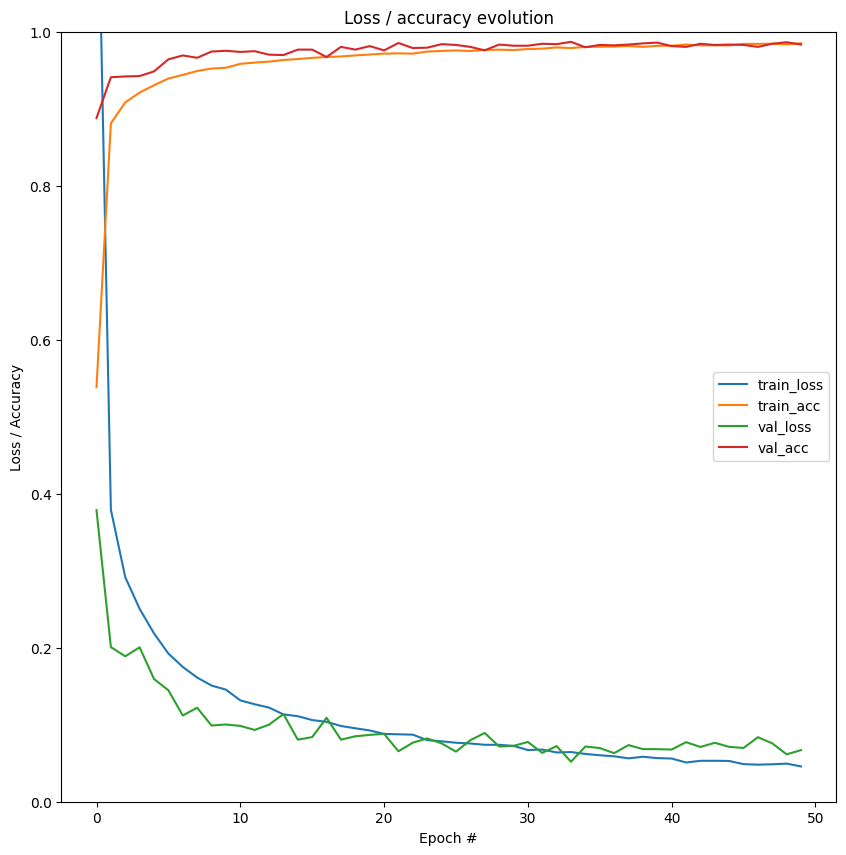

In [34]:
plt.figure(figsize=(10, 10))
plt.plot( H.history["loss"], label="train_loss")
plt.plot( H.history["accuracy"], label="train_acc")
plt.plot( H.history["val_loss"], label="val_loss")
plt.plot( H.history["val_accuracy"], label="val_acc")
plt.title("Loss / accuracy evolution")
plt.xlabel("Epoch #")
plt.ylabel("Loss / Accuracy")
plt.ylim([0, 1])
leg=plt.legend()

In [35]:
print("Test:")
Test_Evaluation = model.evaluate(X_test,  y_test, verbose=2)

Test:
313/313 - 1s - loss: 0.0656 - accuracy: 0.9806 - 931ms/epoch - 3ms/step


In [36]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


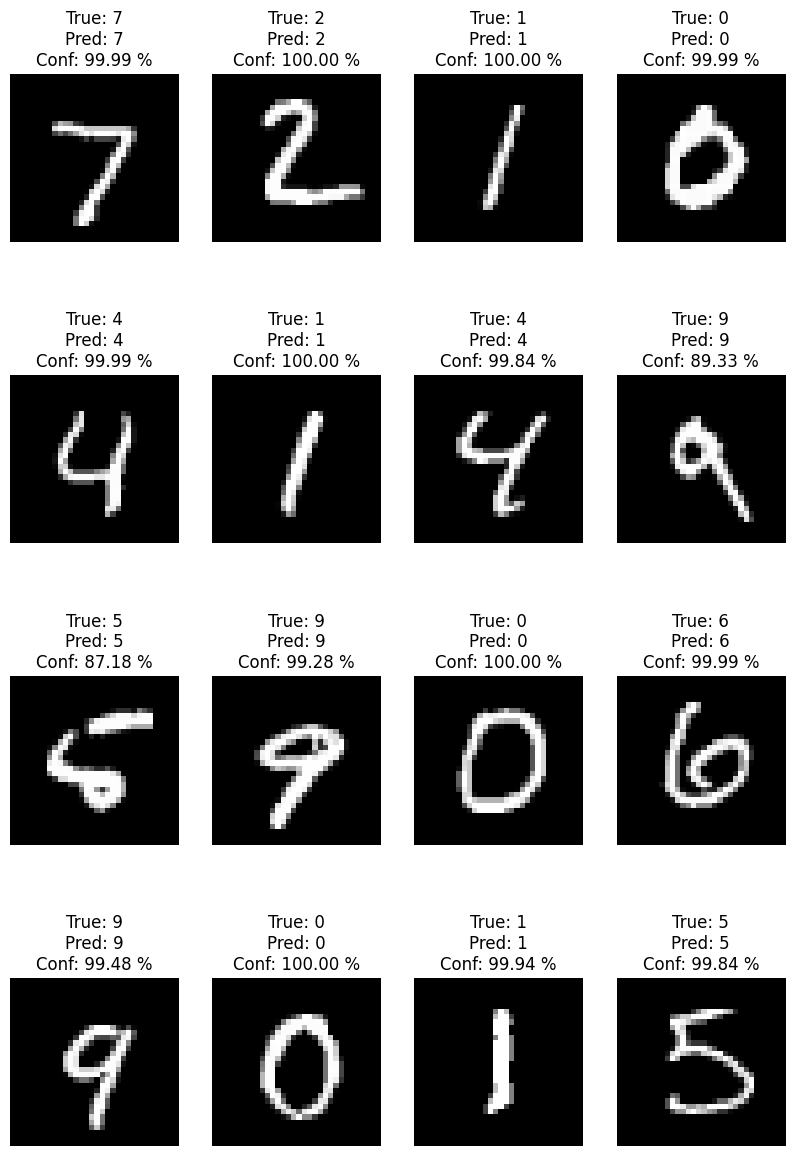

In [37]:
def show_test(y_pred, ran=16, figsize=(10,15)):
  plt.figure(figsize=figsize)
  subplot_ = int(np.sqrt(ran))
  for i in range(0, ran):
    ax = plt.subplot(subplot_, subplot_, i+1)
    ax.set_title("True: {}\nPred: {}\nConf: {:.2f} %".format(y_test[i], np.argmax(y_pred[i]), 100*np.max(y_pred[i])))
    plt.axis("off")
    plt.imshow(X_test[i])
    plt.gray()

show_test(y_pred)

In [38]:
try:
  from google.colab import drive
  import os
  drive.mount('/content/drive')
except:
  print("Drive already mounted")
  pass

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
SAVE_PATH = '/content/drive/MyDrive/models/lenet.h5'
model.save(SAVE_PATH,save_format='h5')

In [ ]:
del model  # deletes the existing model object

from keras.models import load_model
model = load_model(SAVE_PATH)

print("Test:")
Test_Evaluation = model.evaluate(X_test,  y_test, verbose=2)

Test:
313/313 - 2s - loss: 0.0663 - accuracy: 0.9794 - 2s/epoch - 5ms/step
